# Project on census income datataset
Objective: 
The classification goal is to predict the income level of the customers based on the given  attributes
and predict whether the individual makes less or more than $50k. 
It is a binary classification problem


# 1.	Import all the necessary libraries

In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
%matplotlib inline

In [5]:
import seaborn as sns

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, train_test_split, KFold 
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score


# 2.	There are two dataframes to be read - adult.data and adult.test. Load both the datasets


In [7]:

columns = ["age", "workClass", "fnlwgt", "education", "education-num","marital-status", "occupation", "relationship",
          "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"]
train_data = pd.read_csv('adult.data', names=columns, 
             sep=' *, *', na_values='?',engine='python')
test_data  = pd.read_csv('adult.test', names=columns, 
             sep=' *, *', skiprows=1, na_values='?',engine='python')








# 3.	Combine the two dataframes into one

In [8]:
#concating two different dataframes
adult = pd.concat([train_data,test_data])

In [9]:
adult.head()# will check head of data set to have first view


,age,workClass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [10]:
# will reset index values as we concated 2 different dataframes and will check tail to see the index vales for the same.
adult.reset_index(drop=True,inplace=True)
adult.tail()



,age,workClass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.
48841,35,Self-emp-inc,182148,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,60,United-States,>50K.




# 4.	Display the number of missing values(if any) in each of the attributes and treat them accordingly

In [11]:
#checking missing value in cloumns and we can see missing values in native-country,occupation,workClass cloumns

for col in set(adult.columns) - set(adult.describe().columns):
    adult[col] = adult[col].astype('category')
    
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
age               48842 non-null int64
workClass         46043 non-null category
fnlwgt            48842 non-null int64
education         48842 non-null category
education-num     48842 non-null int64
marital-status    48842 non-null category
occupation        46033 non-null category
relationship      48842 non-null category
race              48842 non-null category
sex               48842 non-null category
capital-gain      48842 non-null int64
capital-loss      48842 non-null int64
hours-per-week    48842 non-null int64
native-country    47985 non-null category
income            48842 non-null category
dtypes: category(9), int64(6)
memory usage: 2.7 MB


In [12]:
# we can see missing values in native-country,occupation,workClass cloumns
adult.isnull().sum().sort_values(ascending=False).head()

occupation        2809
workClass         2799
native-country     857
income               0
hours-per-week       0
dtype: int64

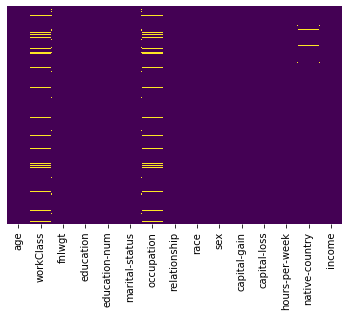

In [13]:
#visualiation of misssing value in heat map
sns.heatmap(adult.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [14]:
# after going through datset  finally i observed there is "?" symbol was there in three cloumns ,so iam replacing that with NAN 
adult = adult.replace('?', np.NaN)
adult.head()


,age,workClass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [15]:
# we will drop NA values to set our data set clean
adult = adult.dropna()
adult.head()

,age,workClass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [16]:
#Now we can see after performing dropna opertaion ,now there is no null values.

adult.isnull().sum().sort_values(ascending=False).head()

income            0
native-country    0
hours-per-week    0
capital-loss      0
capital-gain      0
dtype: int64

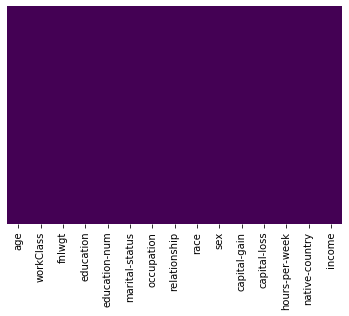

In [17]:
#lets check missing value if any,we can see no missing values now

sns.heatmap(adult.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [18]:
adult.info() # now we can clearly see there is no missing values 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45222 entries, 0 to 48841
Data columns (total 15 columns):
age               45222 non-null int64
workClass         45222 non-null category
fnlwgt            45222 non-null int64
education         45222 non-null category
education-num     45222 non-null int64
marital-status    45222 non-null category
occupation        45222 non-null category
relationship      45222 non-null category
race              45222 non-null category
sex               45222 non-null category
capital-gain      45222 non-null int64
capital-loss      45222 non-null int64
hours-per-week    45222 non-null int64
native-country    45222 non-null category
income            45222 non-null category
dtypes: category(9), int64(6)
memory usage: 2.8 MB


In [19]:
# i have observed that in income column there is mis interpretion of  <=50K and <=50K  as <=50K. and >50K. ,so will handle this here by applying lambda function
adult = adult.applymap(lambda d:"<=50K" if d=="<=50K." else d)
adult = adult.applymap(lambda d:">50K" if d==">50K." else d)

In [20]:
adult['income'].value_counts()

<=50K    34014
>50K     11208
Name: income, dtype: int64

# 5.	Perform basic EDA (  is an open ended task. Do the best you can)

In [21]:
adult.describe(include=[np.number]).transpose() #numerical cloumns  descriptive analysis

,count,mean,std,min,25%,50%,75%,max
age,45222.0,38.547941,13.217870,17.0,28.00,37.0,47.0,90.0
fnlwgt,45222.0,189734.734311,105639.195134,13492.0,117388.25,178316.0,237926.0,1490400.0
education-num,45222.0,10.118460,2.552881,1.0,9.00,10.0,13.0,16.0
capital-gain,45222.0,1101.430344,7506.430084,0.0,0.00,0.0,0.0,99999.0
capital-loss,45222.0,88.595418,404.956092,0.0,0.00,0.0,0.0,4356.0
hours-per-week,45222.0,40.938017,12.007508,1.0,40.00,40.0,45.0,99.0


# Univariate analysis

lets have a look at categorical cloumns distribution

In [22]:
catgr_feat = adult.select_dtypes(include=['object']).columns
catgr_feat


Index(['workClass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country', 'income'],
      dtype='object')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


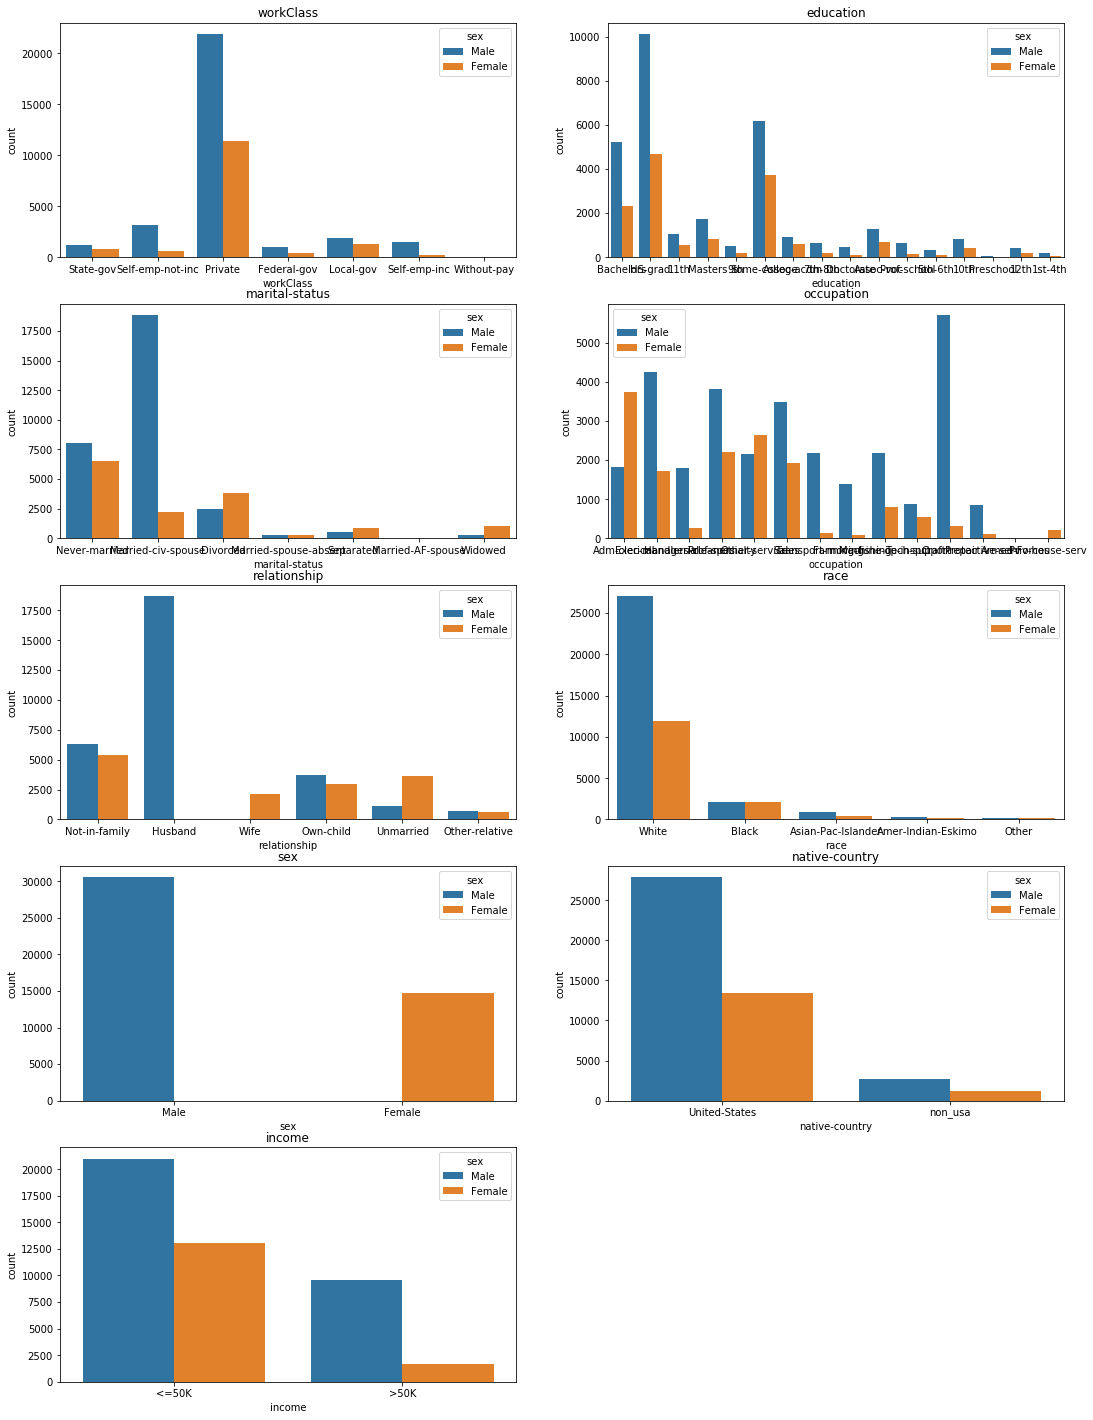

In [23]:
#lets ahve look at distribution of categorical varibles
adult.loc[adult['native-country']!='United-States','native-country'] = 'non_usa'
plt.figure(figsize=(18,25))
plt.subplot(521)

i=0
for c in catgr_feat:
    plt.subplot(5, 2, i+1)
    i += 1
    sns.countplot(x=c, data=adult, hue='sex')
    plt.title(c)

plt.show()

In [24]:
#Distinction between numerical vs. text values(numarical cloumns)
numerical_feat = adult.select_dtypes(include=['int64']).columns
numerical_feat

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


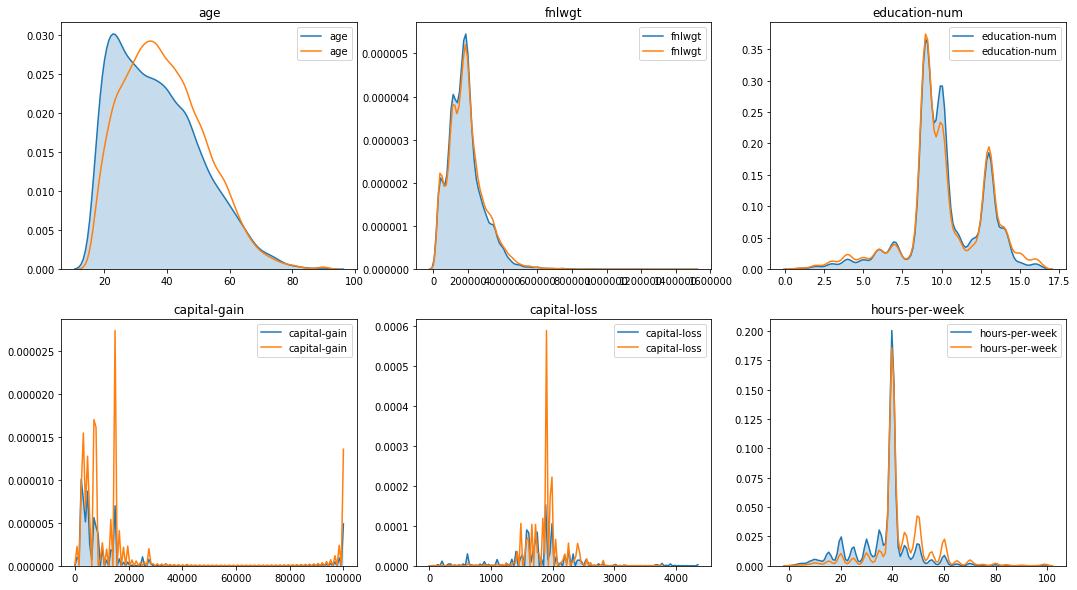

In [25]:
#Distributions of numerical values

plt.figure(figsize=(18,10))
plt.subplot(231)

i=0
for c in numerical_feat:
    plt.subplot(2, 3, i+1)
    i += 1
    sns.kdeplot(adult[adult['sex'] == 'Female'][c], shade=True, )
    sns.kdeplot(adult[adult['sex'] == 'Male'][c], shade=False)
    plt.title(c)

plt.show()

There are significant differences when it comes to capital gain / loss and hours per week.

# Bivariate analysis

let have  a look at how categorical attributes have  reation ship with target cloumn income

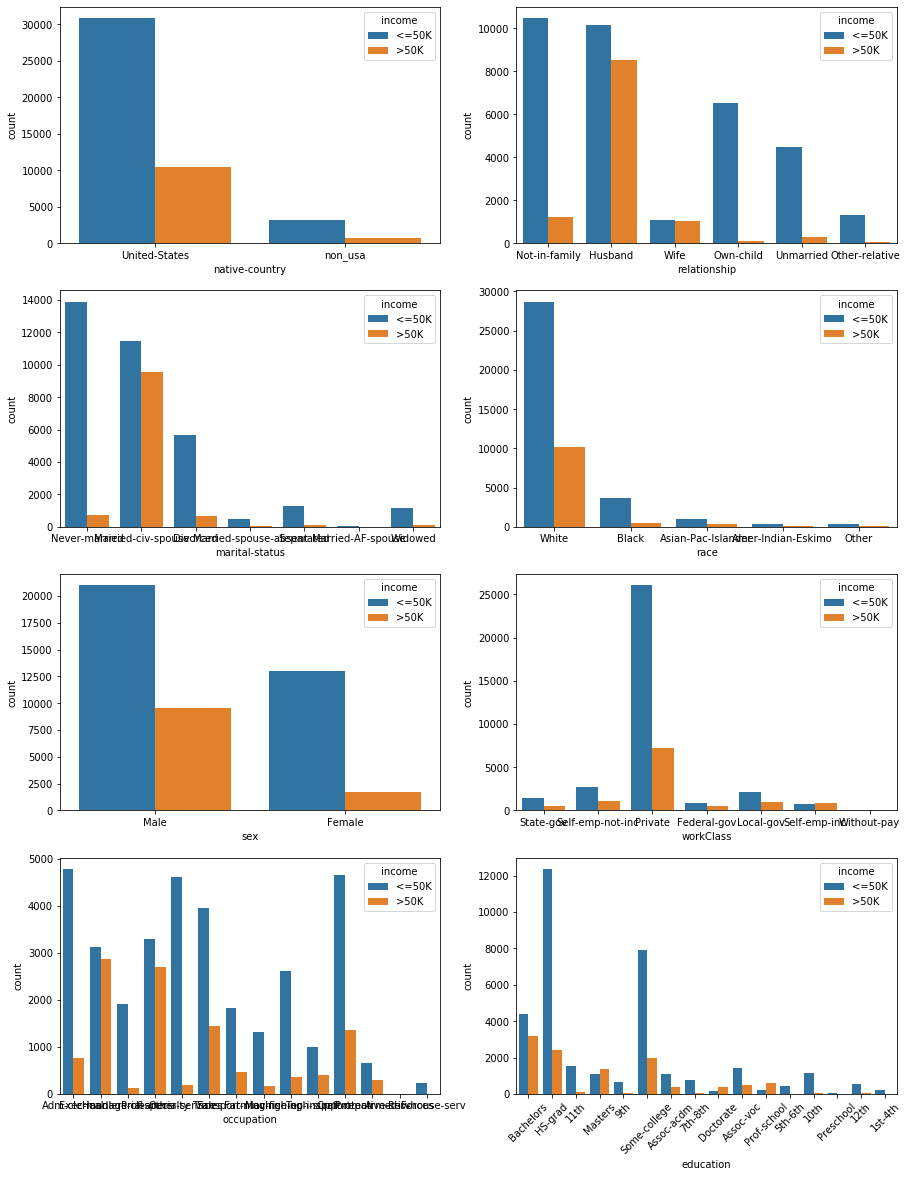

In [26]:
#lets ahve a look at how  target variable 'income '' distrubuted across  individual atrributes ,using income as hue
adult.loc[adult['native-country']!='United-States','native-country'] = 'non_usa'
import seaborn as sns
fig, ((a,b),(c,d),(e,f),(g,h)) = plt.subplots(4,2,figsize=(15,20))
plt.xticks(rotation=45)
sns.countplot(adult['workClass'],hue=adult['income'],ax=f)
sns.countplot(adult['relationship'],hue=adult['income'],ax=b)
sns.countplot(adult['marital-status'],hue=adult['income'],ax=c)
sns.countplot(adult['race'],hue=adult['income'],ax=d)
sns.countplot(adult['sex'],hue=adult['income'],ax=e)
sns.countplot(adult['native-country'],hue=adult['income'],ax=a)
sns.countplot(adult['occupation'],hue=adult['income'],ax=g)
sns.countplot(adult['education'],hue=adult['income'],ax=h)




lets have a look at how numerical columns related with  target cloumn income

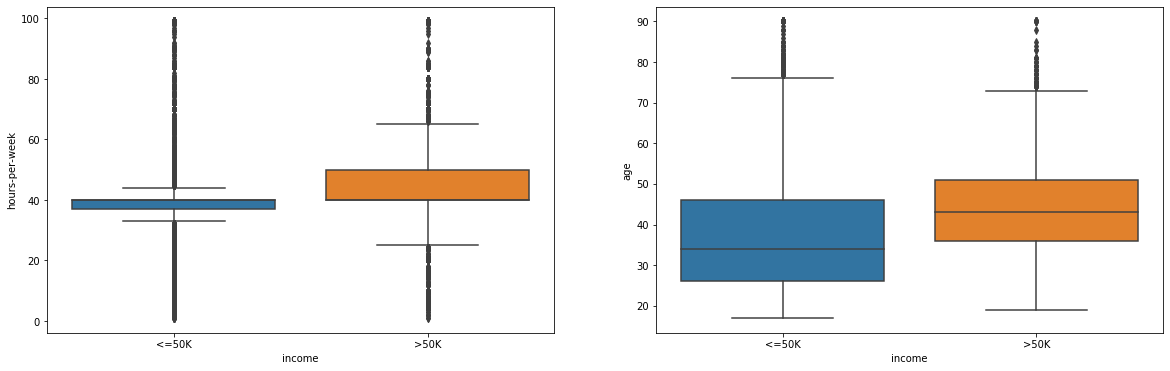

In [27]:
fig, (a,b)= plt.subplots(1,2,figsize=(20,6))
sns.boxplot(y='hours-per-week',x='income',data=adult,ax=a)
sns.boxplot(y='age',x='income',data=adult,ax=b)

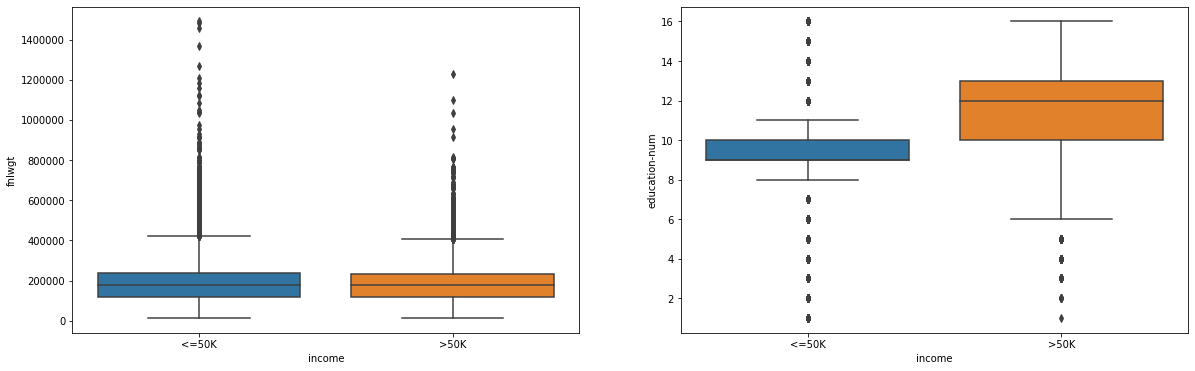

In [28]:
fig, (a,b)= plt.subplots(1,2,figsize=(20,6))
sns.boxplot(y='fnlwgt',x='income',data=adult,ax=a)
sns.boxplot(y='education-num',x='income',data=adult,ax=b)

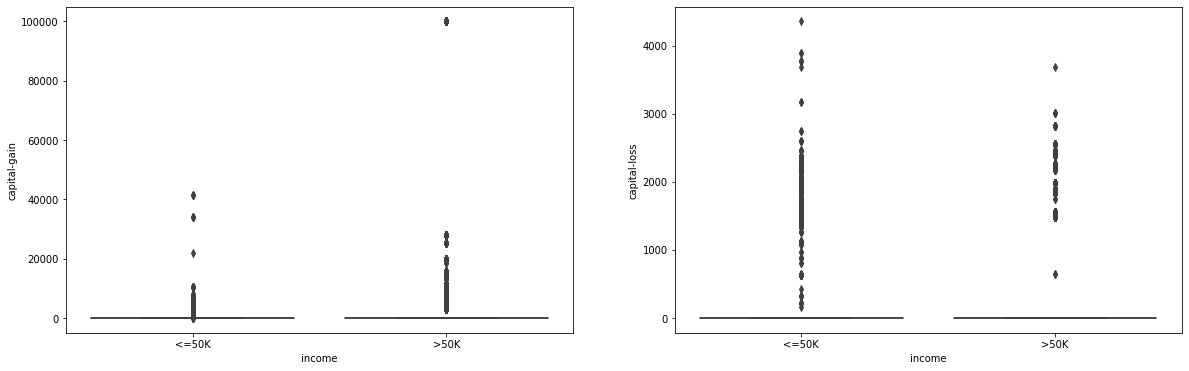

In [29]:
fig, (a,b)= plt.subplots(1,2,figsize=(20,6))
sns.boxplot(y='capital-gain',x='income',data=adult,ax=a)
sns.boxplot(y='capital-loss',x='income',data=adult,ax=b)

There are far more male earning >50k than female, but at the same time there are also more male earning <50k and even more males recorded in general. The counts need to be normalized



# Multivariate analysis

Text(0.5, 1, 'Heatmap showing correlations between numerical data')

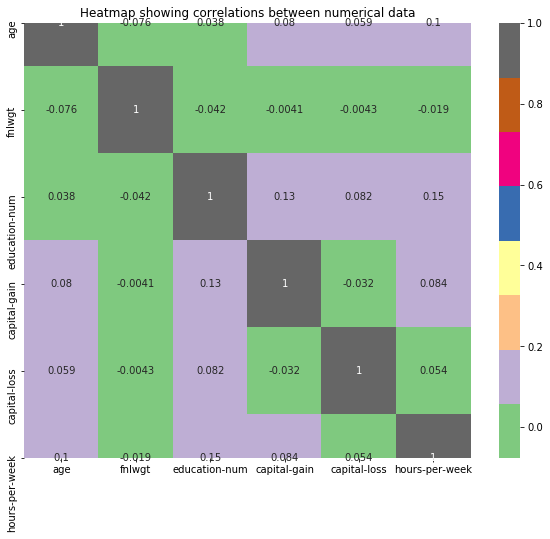

In [30]:
#checking the co relationship with all the varibles
plt.figure(figsize=(10,8))  
sns.heatmap(adult.corr(),cmap='Accent',annot=True)
#adult.corr()
plt.title('Heatmap showing correlations between numerical data')

<Figure size 1152x720 with 0 Axes>

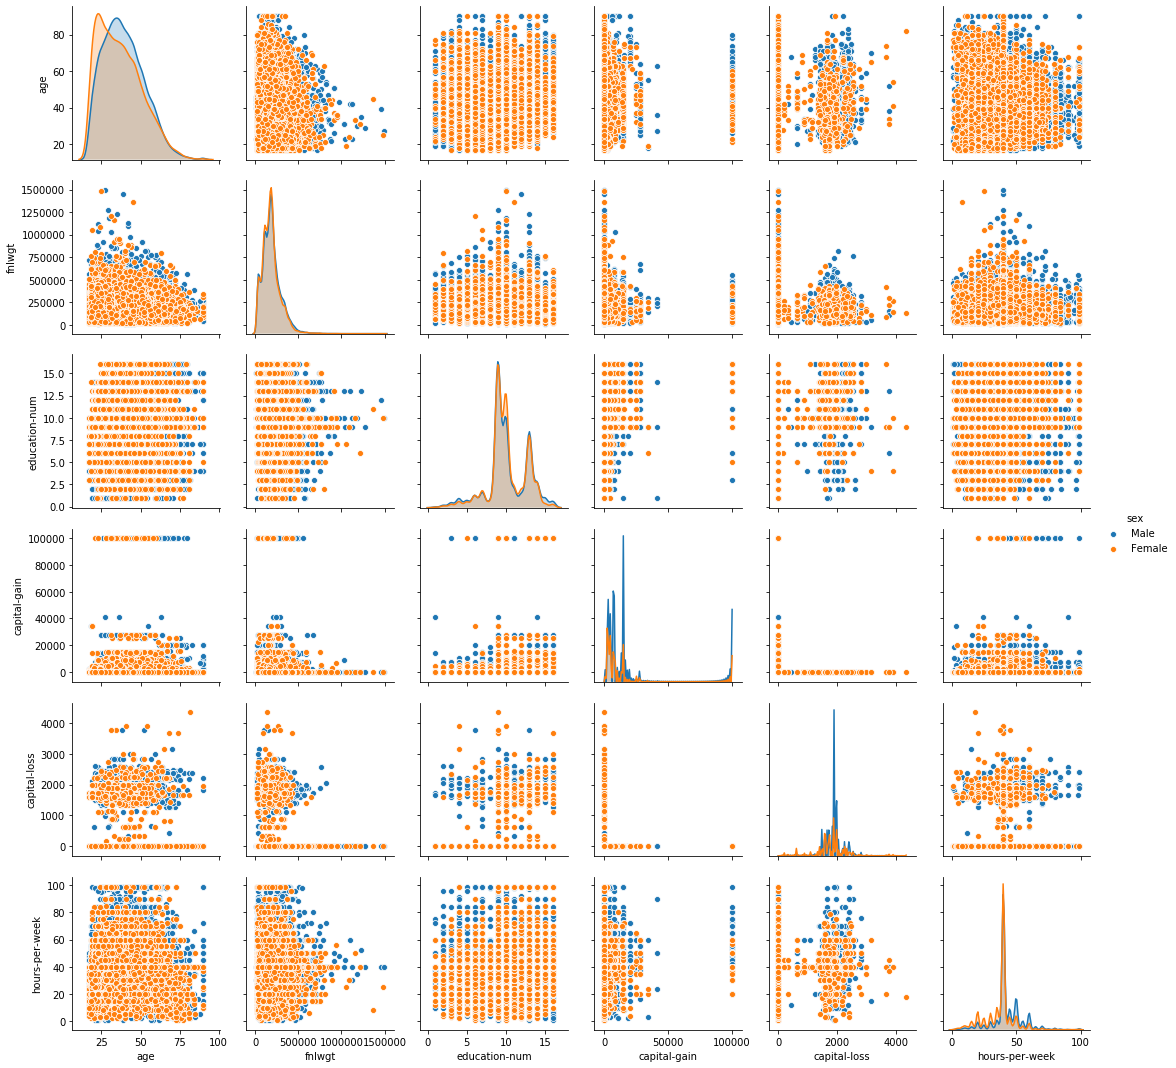

In [31]:
#Plot pairwise relationships in a dataset,income over difrent numerical cloumns.
plt.figure(1, figsize=(16,10))
sns.pairplot(data=adult, hue='sex')
plt.show()

In [32]:
# Taking a look at the target (income) without distinction of sex
print(f"Ratio above 50k : {(adult['income'] == '>50K').astype('int').sum() / adult.shape[0] * 100 :.2f}%")

Ratio above 50k : 24.78%


In [33]:
# number of female / male
number_female = (adult.sex == 'Female').astype('int').sum()
number_male = (adult.sex == 'Male').astype('int').sum()
number_female, number_male

(14695, 30527)

In [34]:
# number of people earning more or less than 50k per gender
number_male_above = len(adult[(adult.income == '>50K') & (adult.sex == 'Male')])
number_male_below = len(adult[(adult.income == '<=50K') & (adult.sex == 'Male')])
number_female_above = len(adult[(adult.income == '>50K') & (adult.sex == 'Female')])
number_female_below = len(adult[(adult.income == '<=50K') & (adult.sex == 'Female')])
number_male_above, number_male_below, number_female_above, number_female_below

(9539, 20988, 1669, 13026)

In [35]:
#will display sex wise earnings in percentage
print(f'Among Males   : {number_male_above/number_male*100:.0f}% earn >50K // {number_male_below/number_male*100:.0f}% earn <=50K')
print(f'Among Females : {number_female_above/number_female*100:.0f}% earn >50K // {number_female_below/number_female*100:.0f}% earn <=50K')

Among Males   : 31% earn >50K // 69% earn <=50K
Among Females : 11% earn >50K // 89% earn <=50K


In [36]:
# normalization for sex cloumns for income
number_male_above /= number_male 
number_male_below /= number_male
number_female_above /= number_female
number_female_below /= number_female
number_male_above, number_male_below, number_female_above, number_female_below

(0.31247747895305794,
 0.687522521046942,
 0.11357604627424293,
 0.8864239537257571)

In [37]:
print(f'Among people earning >50K  : {number_male_above / (number_male_above + number_female_above) *100 :.0f}% are Females and {number_female_above / (number_male_above + number_female_above) *100 :.0f}% are Males')
print(f'Among people earning =<50K : {number_male_below / (number_male_below + number_female_below) *100 :.0f}% are Females and {number_female_below / (number_male_below + number_female_below) *100 :.0f}% are Males')

Among people earning >50K  : 73% are Females and 27% are Males
Among people earning =<50K : 44% are Females and 56% are Males


The distinction between american natives and the others should also be made

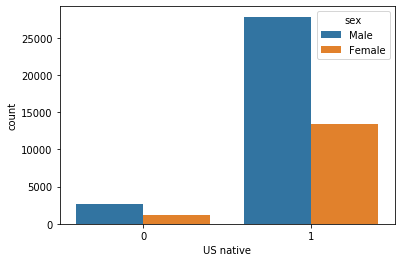

In [38]:
adult['US native'] = (adult['native-country'] == 'United-States').astype('int')
plt.figure(figsize=(6,4))
sns.countplot(x='US native', data=adult, hue='sex')
plt.show()

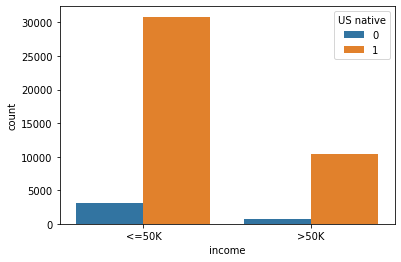

In [39]:
plt.figure(figsize=(6,4))
sns.countplot(x='income', data=adult, hue='US native')
plt.show()

In [40]:
# number of people earning more or less than 50k per origin
number_native_above = len(adult[(adult.income == '>50K') & (adult['US native'] == 1)])
number_native_below = len(adult[(adult.income == '<=50K') & (adult['US native'] == 1)])
number_foreign_above = len(adult[(adult.income == '>50K') & (adult['US native'] == 0)])
number_foreign_below = len(adult[(adult.income == '<=50K') & (adult['US native'] == 0)])
number_native_above, number_native_below, number_foreign_above, number_foreign_below

(10448, 30844, 760, 3170)

In [41]:
number_native = (adult['US native'] == 1).astype('int').sum()
number_foreign = adult.shape[0] - number_native
number_native, number_foreign

(41292, 3930)

In [42]:
print(f'Among natives    : {number_native_above/number_native*100:.0f}% earn >50K // {number_native_below/number_native*100:.0f}% earn <=50K')
print(f'Among foreigners : {number_foreign_above/number_foreign*100:.0f}% earn >50K // {number_foreign_below/number_foreign*100:.0f}% earn <=50K')

Among natives    : 25% earn >50K // 75% earn <=50K
Among foreigners : 19% earn >50K // 81% earn <=50K


In [43]:
# normalization for narive country clouns for income
number_native_above /= number_native
number_native_below /= number_native
number_foreign_above /= number_foreign
number_foreign_below /= number_foreign
number_native_above, number_native_below, number_foreign_above, number_foreign_below


(0.25302722076915624,
 0.7469727792308437,
 0.19338422391857507,
 0.806615776081425)

In [44]:
print(f'Among people earning >50K  : {number_native_above / (number_native_above + number_foreign_above) *100 :.0f}% are natives and {number_foreign_above / (number_native_above + number_foreign_above) *100 :.0f}% are foreigners')
print(f'Among people earning =<50K : {number_native_below / (number_native_below + number_foreign_below) *100 :.0f}% are natives and {number_foreign_below / (number_native_below + number_foreign_below) *100 :.0f}% are foreigners')

Among people earning >50K  : 57% are natives and 43% are foreigners
Among people earning =<50K : 48% are natives and 52% are foreigners


# 6.	Prepare/preprocess the data to train any given ML model

In [45]:
#One-hot encode the 'features_log_minmax_transform' data using pandas.get_dummies
adult = pd.get_dummies(adult, drop_first=True)
print("Number of feautres after one-hot encoding {}".format(len(list(adult))))


Number of feautres after one-hot encoding 59


In [46]:
adult.tail()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,US native,workClass_Local-gov,workClass_Private,workClass_Self-emp-inc,...,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male,native-country_non_usa,income_>50K
48836,33,245211,13,0,0,40,1,0,1,0,...,1,0,0,0,0,0,1,1,0,0
48837,39,215419,13,0,0,36,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
48839,38,374983,13,0,0,50,1,0,1,0,...,0,0,0,0,0,0,1,1,0,0
48840,44,83891,13,5455,0,40,1,0,1,0,...,1,0,0,1,0,0,0,1,0,0
48841,35,182148,13,0,0,60,1,0,0,1,...,0,0,0,0,0,0,1,1,0,1


In [47]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [48]:
# Apply Scaling 
std_scale = preprocessing.StandardScaler().fit(adult.drop('income_>50K', axis=1))
X = std_scale.transform(adult.drop('income_>50K', axis=1))
y = adult['income_>50K']

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int32, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype uint8, int32, int64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


# 7.	Split the data into train and test set. test set size = 30% of the original combined data


In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.30, random_state=1)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))


Training set has 31655 samples.
Testing set has 13567 samples.


# 8.	Use any 4 classification algorithms learnt during the course, fit the models with the train data and predict on the test set



# 9.	Compute the accuracy, recall and precision for each of the models

In [50]:
#Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
y_pred = logreg.predict(X_test)
score_logreg = logreg.score(X_test,Y_test)
print('The accuracy of the Logistic Regression is', score_logreg)

print(metrics.confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test,y_pred))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


The accuracy of the Logistic Regression is 0.8522886415567185
[[9528  702]
 [1302 2035]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.90     10230
           1       0.74      0.61      0.67      3337

   micro avg       0.85      0.85      0.85     13567
   macro avg       0.81      0.77      0.79     13567
weighted avg       0.85      0.85      0.85     13567



logistic regrsssion is giving accuacy of 85.2%  and we can also check the confusion matrix above and precison and recall matrics for for class level accuracy

In [51]:
# Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
y_pred = gaussian.predict(X_test)
score_gaussian = gaussian.score(X_test,Y_test)
print('The accuracy of Gaussian Naive Bayes is', score_gaussian)
print(metrics.confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test,y_pred))

The accuracy of Gaussian Naive Bayes is 0.7289747180658952
[[6892 3338]
 [ 339 2998]]
              precision    recall  f1-score   support

           0       0.95      0.67      0.79     10230
           1       0.47      0.90      0.62      3337

   micro avg       0.73      0.73      0.73     13567
   macro avg       0.71      0.79      0.70     13567
weighted avg       0.84      0.73      0.75     13567



Gaussian Naive Bayes is giving accuacy of 72.8%  and we can also check the confusion matrix above and precison and recall matrics for for class level accuracy

In [52]:

# K-Nearest Neighbors
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
y_pred = knn.predict(X_test)
score_knn = knn.score(X_test,Y_test)
print('The accuracy of the KNN Model is',score_knn)
print(metrics.confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test,y_pred))

The accuracy of the KNN Model is 0.8239846686813592
[[9242  988]
 [1400 1937]]
              precision    recall  f1-score   support

           0       0.87      0.90      0.89     10230
           1       0.66      0.58      0.62      3337

   micro avg       0.82      0.82      0.82     13567
   macro avg       0.77      0.74      0.75     13567
weighted avg       0.82      0.82      0.82     13567



 K-Nearest Neighbors is giving accuacy of 82.3%  and we can also check the confusion matrix above and precison and recall matrics for for class level accuracy


Next we will check support vector machine classifier models
we will check 4 diffrent kearnels for better accuracy(Linear
Polynomial
Gaussian (RBF)
Sigmoid)



In [53]:
# Support Vector Classifier (SVM/SVC)
from sklearn.svm import SVC
from sklearn import svm
svc_radical =svm.SVC(kernel='rbf',gamma='scale')
svc_radical.fit(X_train,Y_train.values.ravel())
score_svc_radical = svc_radical.score(X_test,Y_test)
print('The accuracy of Radical SVC Model is', score_svc_radical)
print(metrics.confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test,y_pred))

The accuracy of Radical SVC Model is 0.8500036854131348
[[9242  988]
 [1400 1937]]
              precision    recall  f1-score   support

           0       0.87      0.90      0.89     10230
           1       0.66      0.58      0.62      3337

   micro avg       0.82      0.82      0.82     13567
   macro avg       0.77      0.74      0.75     13567
weighted avg       0.82      0.82      0.82     13567



Support Vector Classifier radical model  is giving accuacy of 85%  and we can also check the confusion matrix above and precison and recall matrics for for class level accuracy

In [54]:
# Support Vector Classifier (SVM/SVC)
from sklearn.svm import SVC
from sklearn import svm
svc_Polynomial =svm.SVC(kernel='poly',gamma='scale')
svc_Polynomial.fit(X_train,Y_train.values.ravel())
score_svc_Polynomial = svc_Polynomial.score(X_test,Y_test)
print('The accuracy of Polynomial SVC Model is', score_svc_Polynomial)
print(metrics.confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test,y_pred))

The accuracy of Polynomial SVC Model is 0.8385051964325201
[[9242  988]
 [1400 1937]]
              precision    recall  f1-score   support

           0       0.87      0.90      0.89     10230
           1       0.66      0.58      0.62      3337

   micro avg       0.82      0.82      0.82     13567
   macro avg       0.77      0.74      0.75     13567
weighted avg       0.82      0.82      0.82     13567



Support Vector Classifier Polynomial model   is giving accuacy of 83.5.%  and we can also check the confusion matrix above and precison and recall matrics for for class level accuracy

In [55]:
# Support Vector Classifier (SVM/SVC)
from sklearn.svm import SVC
from sklearn import svm
svc_linear =svm.SVC(kernel='linear',gamma='scale')
svc_linear.fit(X_train,Y_train.values.ravel())
score_svc_linear = svc_linear.score(X_test,Y_test)
print('The accuracy of linear SVC Model is', score_svc_linear)
print(metrics.confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test,y_pred))

The accuracy of linear SVC Model is 0.8477924375322473
[[9242  988]
 [1400 1937]]
              precision    recall  f1-score   support

           0       0.87      0.90      0.89     10230
           1       0.66      0.58      0.62      3337

   micro avg       0.82      0.82      0.82     13567
   macro avg       0.77      0.74      0.75     13567
weighted avg       0.82      0.82      0.82     13567



Support Vector Classifier linear svc model   is giving accuacy of 84.7.%  and we can also check the confusion matrix above and precison and recall matrics for for class level accuracy

In [56]:
# Support Vector Classifier (SVM/SVC)
from sklearn.svm import SVC
from sklearn import svm
svc_sigmoid =svm.SVC(kernel='sigmoid',gamma='scale')
svc_sigmoid.fit(X_train,Y_train.values.ravel())
score_svc_sigmoid = svc_sigmoid.score(X_test,Y_test)
print('The accuracy of sigmoid SVC Model is', score_svc_sigmoid)
print(metrics.confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test,y_pred))

The accuracy of sigmoid SVC Model is 0.7933220313997199
[[9242  988]
 [1400 1937]]
              precision    recall  f1-score   support

           0       0.87      0.90      0.89     10230
           1       0.66      0.58      0.62      3337

   micro avg       0.82      0.82      0.82     13567
   macro avg       0.77      0.74      0.75     13567
weighted avg       0.82      0.82      0.82     13567



Support Vector Classifier sigmoid model  is giving accuacy of 79.3%  and we can also check the confusion matrix above and precison and recall matrics for for class level accuracy

From above all the models  logistic regression model and support vector classifier  radical models are giving similer accuracy and best across all above,



# 10.	Try to improve the performance by either dropping few columns or tuning the models (It is an open ended task. Do your best)

In [57]:
adult.info() #will check the attributes

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45222 entries, 0 to 48841
Data columns (total 59 columns):
age                                     45222 non-null int64
fnlwgt                                  45222 non-null int64
education-num                           45222 non-null int64
capital-gain                            45222 non-null int64
capital-loss                            45222 non-null int64
hours-per-week                          45222 non-null int64
US native                               45222 non-null int32
workClass_Local-gov                     45222 non-null uint8
workClass_Private                       45222 non-null uint8
workClass_Self-emp-inc                  45222 non-null uint8
workClass_Self-emp-not-inc              45222 non-null uint8
workClass_State-gov                     45222 non-null uint8
workClass_Without-pay                   45222 non-null uint8
education_11th                          45222 non-null uint8
education_12th                       

# Out of all models logistic regression is having max accurcay  ,so we will try to improve the performace

In [58]:
#dropping fnlwgt cloumn to  check the performace of model
drop_elements =['income_>50K','fnlwgt','hours-per-week','age']

In [59]:
y = adult["income_>50K"]

In [60]:
X = adult.drop(drop_elements, axis=1)


In [61]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.30, random_state=1)


In [62]:
# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))


Training set has 31655 samples.
Testing set has 13567 samples.


In [63]:
#Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
y_pred = logreg.predict(X_test)
score_logreg = logreg.score(X_test,Y_test)
print('The accuracy of the Logistic Regression is', score_logreg)

print(metrics.confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test,y_pred))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


The accuracy of the Logistic Regression is 0.8492666027861723
[[9577  653]
 [1392 1945]]
              precision    recall  f1-score   support

           0       0.87      0.94      0.90     10230
           1       0.75      0.58      0.66      3337

   micro avg       0.85      0.85      0.85     13567
   macro avg       0.81      0.76      0.78     13567
weighted avg       0.84      0.85      0.84     13567



# we can see in above exmaple when we try to drop any cloumn acuracy is going down

we will use cross validation for tuning the logstic model

In [64]:
#from sklearn import svm
### cross validation
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
kfold = KFold(n_splits=10, random_state=10) # k=10, split the data into 10 equal parts
cv_result = cross_val_score(logreg,X,y, cv = kfold,scoring = "accuracy")
cv_result.max()


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

0.8502874834144184

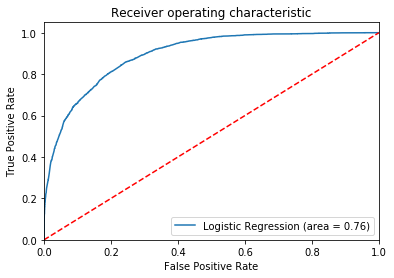

In [65]:
#lets have a look at roc auc curve for logistic regression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(Y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(Y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

from above cross validtion we can see not much improvised performance after performing cross validation ,accuracy almost similer to earlier

In [66]:
auc_score = metrics.roc_auc_score(Y_test, logreg.predict_proba(X_test)[:,1])
round( float( auc_score ), 2 )

0.89

# we will try cross validtion to improve knn model for better accuracy

In [67]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
kfold = KFold(n_splits=10, random_state=10) # k=10, split the data into 10 equal parts
cv_result = cross_val_score(knn,X,y, cv = kfold,scoring = "accuracy")
cv_result.max()


0.8505416758788414

# (optional) we can try grid search cv for tunning knn and svc for better performnace and am am just marking  the cells and its taking time to execute,just for reference i have added the code also

In [68]:
#Using grid search cv for tunning knn model,its taking time to execute (can run code)

In [69]:
#param_grid = {'C':[1,10,100,1000],'gamma':[1,0.1,0.001,0.0001], 'kernel':['linear','rbf']}

In [70]:
#grid = GridSearchCV(SVC(),param_grid,refit = True, verbose=2)

In [71]:
#grid.fit(X_train,Y_train)

In [72]:
# print best parameter after tuning 
#print(grid.best_params_) 
  
## print how our model looks after hyper-parameter tuning 
#print(grid.best_estimator_)

In [73]:

#grid_predictions = grid.predict(X_test) 
  
# print classification report 
#print(classification_report(Y_test, grid_predictions))

In [74]:
#Below code for knn

In [75]:
# define the parameter values that should be searched
#k_range = list(range(1, 31))
#weight_options = ['uniform', 'distance']


In [76]:
# create a parameter grid: map the parameter names to the values that should be searched

#param_grid = dict(n_neighbors=k_range, weights=weight_options)
#print(param_grid)

In [77]:
# instantiate and fit the grid
#grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False)
#grid.fit(X, y)

In [78]:
# print best parameter after tuning 
#print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
#print(grid.best_estimator_)

In [79]:
#grid_predictions = grid.predict(X_test) 
  
# print classification report 
#print(classification_report(Y_test, grid_predictions))

# 11.	Create a dataframe with 4 columns. [‘model name’, ‘accuracy’, ‘recall’ and ‘precision’]. Populate the data-frame accordingly

In [80]:
parameter={'modelname':['logisticregression','GaussianNaiveBayes','K-NearestNeighbors','supportvector_classifier'],
          'accuracy':['0.852','0.728','0.823','0.85'],
          'recall':['0.93 and 0.61','0.67 and 0.90','0.90 and 0.58','0.90 and 0.58'],
          'precision':['0.88 and 0.74','0.95 and 0.47','0.87 and 0.66','0.87 and 0.66']}

models=pd.DataFrame(parameter)


In [81]:
models#will display dataframe

,modelname,accuracy,recall,precision
0,logisticregression,0.852,0.93 and 0.61,0.88 and 0.74
1,GaussianNaiveBayes,0.728,0.67 and 0.90,0.95 and 0.47
2,K-NearestNeighbors,0.823,0.90 and 0.58,0.87 and 0.66
3,supportvector_classifier,0.85,0.90 and 0.58,0.87 and 0.66


# Conclusion:By running diffrent machine learning algorithms,we noticed that logistic regression and support vector classifers are giving better results
   

# I have tried to  tune the models using cross validtion and grid search cv ,when i run grid search its taking more time to execute  and i just marked down the code for refernce.